In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime,date
import scipy.stats
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/MSc - Shiveswarran/Processed data/bus_trips_all/bus_trips_all.csv')

In [ ]:
df = data

In [ ]:
df = df[(df['time_of_day']>6) & (df['time_of_day']<20)]

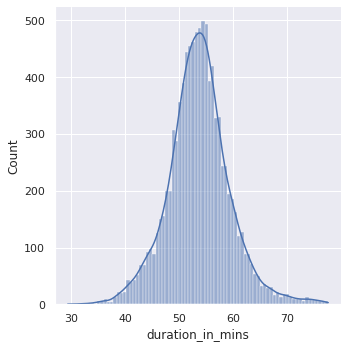

In [ ]:

sns.displot(df, x="duration_in_mins", kde=True,)


In [ ]:
df['weekday/end'] = list(map(lambda x: 1 if x < 5 else 0 , (df['day_of_week'])))

In [ ]:
df

,trip_id,deviceid,date,start_terminal,end_terminal,direction,start_time,end_time,duration,day_of_week,hour_of_day,duration_in_mins,weekday/end
0,1.0,116,2022-01-01,BT02,BT01,2,06:01:09,06:45:09,0:44:00,5,6,44.000000,0
1,2.0,116,2022-01-01,BT01,BT02,1,07:00:27,07:49:50,0:49:23,5,7,49.383333,0
2,3.0,116,2022-01-01,BT02,BT01,2,12:47:58,13:49:42,1:01:44,5,12,61.733333,0
3,4.0,116,2022-01-01,BT01,BT02,1,14:05:09,14:54:23,0:49:14,5,14,49.233333,0
4,5.0,116,2022-01-01,BT02,BT01,2,16:19:02,17:16:45,0:57:43,5,16,57.716667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,3326.0,1719,2022-01-27,BT01,BT02,1,07:21:39,08:13:04,0:51:25,3,7,51.416667,1
3326,3327.0,1719,2022-01-27,BT02,BT01,2,10:20:18,11:15:18,0:55:00,3,10,55.000000,1
3327,3328.0,1719,2022-01-27,BT01,BT02,1,11:30:45,12:28:39,0:57:54,3,11,57.900000,1
3328,3329.0,1719,2022-01-27,BT02,BT01,2,14:30:37,15:20:00,0:49:23,3,14,49.383333,1


In [ ]:
weekday_trips = df[df['weekday/end'] == 1]

In [ ]:
weekday_trips

,trip_id,deviceid,date,start_terminal,end_terminal,direction,start_time,end_time,duration,day_of_week,hour_of_day,duration_in_mins,weekday/end
14,15.0,116,2022-01-03,BT02,BT01,2,08:50:11,09:41:17,0:51:06,0,8,51.100000,1
15,16.0,116,2022-01-03,BT01,BT02,1,10:00:47,10:52:13,0:51:26,0,10,51.433333,1
16,17.0,116,2022-01-03,BT02,BT01,2,12:30:33,13:27:17,0:56:44,0,12,56.733333,1
17,18.0,116,2022-01-03,BT01,BT02,1,13:41:47,14:38:43,0:56:56,0,13,56.933333,1
18,19.0,116,2022-01-03,BT02,BT01,2,15:49:21,16:41:24,0:52:03,0,15,52.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,3326.0,1719,2022-01-27,BT01,BT02,1,07:21:39,08:13:04,0:51:25,3,7,51.416667,1
3326,3327.0,1719,2022-01-27,BT02,BT01,2,10:20:18,11:15:18,0:55:00,3,10,55.000000,1
3327,3328.0,1719,2022-01-27,BT01,BT02,1,11:30:45,12:28:39,0:57:54,3,11,57.900000,1
3328,3329.0,1719,2022-01-27,BT02,BT01,2,14:30:37,15:20:00,0:49:23,3,14,49.383333,1


In [ ]:
df1 = df[df['direction'] == 1]
df2 = df[df['direction'] == 2]

In [ ]:
df1

,trip_id,deviceid,date,start_terminal,end_terminal,direction,start_time,end_time,duration,duration_in_mins,day_of_week,time_of_day,trip_id_old
0,1,262,2021-10-01,BT01,BT02,1,06:39:49,07:27:32,0:47:43,47.72,4,6.50,9a22.0
6,7,1143,2021-10-01,BT01,BT02,1,08:21:24,09:14:58,0:53:34,53.57,4,8.25,9a278.0
7,8,274,2021-10-01,BT01,BT02,1,08:40:27,09:34:49,0:54:22,54.37,4,8.50,9a92.0
9,10,123,2021-10-01,BT01,BT02,1,09:11:33,10:00:55,0:49:22,49.37,4,9.00,9a2.0
10,11,513,2021-10-01,BT01,BT02,1,09:31:27,10:24:37,0:53:10,53.17,4,9.50,9a270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,10218,274,2022-02-28,BT01,BT02,1,17:54:02,18:37:05,0:43:03,43.05,0,17.75,2a976.0
10219,10220,121,2022-02-28,BT01,BT02,1,18:04:52,18:52:18,0:47:26,47.43,0,18.00,2a355.0
10221,10222,116,2022-02-28,BT01,BT02,1,18:48:23,19:40:40,0:52:17,52.28,0,18.75,2a150.0
10222,10223,250,2022-02-28,BT01,BT02,1,19:19:09,20:14:41,0:55:32,55.53,0,19.25,2a647.0


In [ ]:
df2

,trip_id,deviceid,date,start_terminal,end_terminal,direction,start_time,end_time,duration,duration_in_mins,day_of_week,time_of_day,trip_id_old
1,2,1143,2021-10-01,BT02,BT01,2,06:50:46,07:38:33,0:47:47,47.78,4,6.75,9a277.0
2,3,274,2021-10-01,BT02,BT01,2,06:58:03,07:51:21,0:53:18,53.30,4,6.75,9a91.0
3,4,123,2021-10-01,BT02,BT01,2,07:30:59,08:15:44,0:44:45,44.75,4,7.50,9a1.0
4,5,513,2021-10-01,BT02,BT01,2,07:49:42,08:39:23,0:49:41,49.68,4,7.75,9a269.0
5,6,1358,2021-10-01,BT02,BT01,2,07:59:57,08:45:24,0:45:27,45.45,4,7.75,9a285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10212,10213,121,2022-02-28,BT02,BT01,2,17:00:11,17:51:32,0:51:21,51.35,0,17.00,2a354.0
10213,10214,116,2022-02-28,BT02,BT01,2,17:20:31,18:26:52,1:06:21,66.35,0,17.25,2a149.0
10215,10216,1408,2022-02-28,BT02,BT01,2,17:40:57,18:36:49,0:55:52,55.87,0,17.50,2a1927.0
10218,10219,250,2022-02-28,BT02,BT01,2,18:00:41,18:54:57,0:54:16,54.27,0,18.00,2a646.0


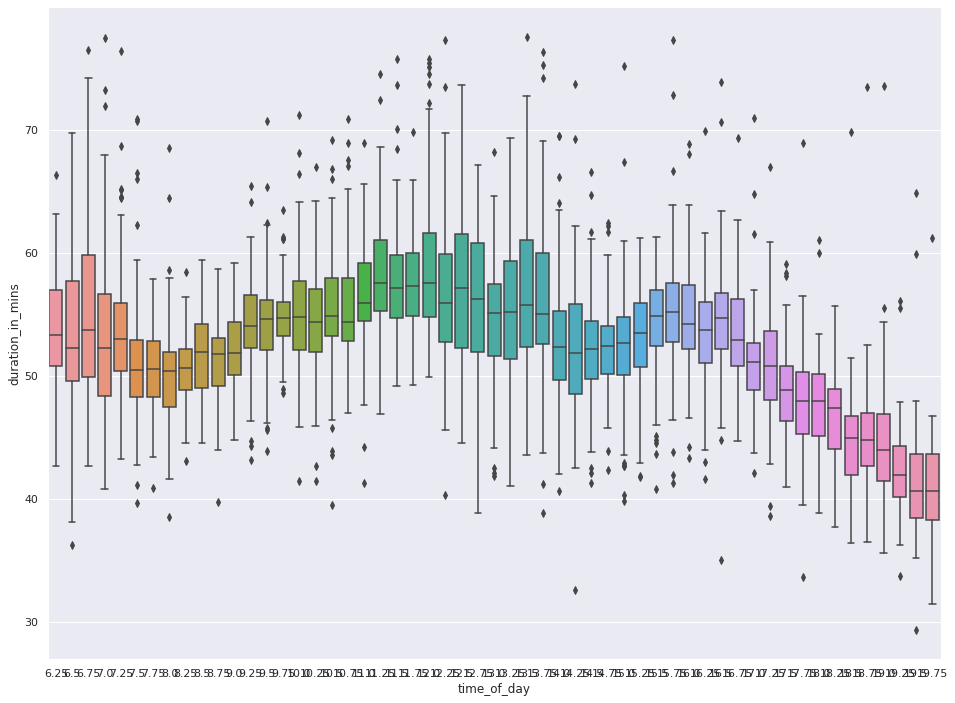

In [ ]:
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(16,12)})
sns.boxplot(x='time_of_day', y='duration_in_mins', data =  df1)

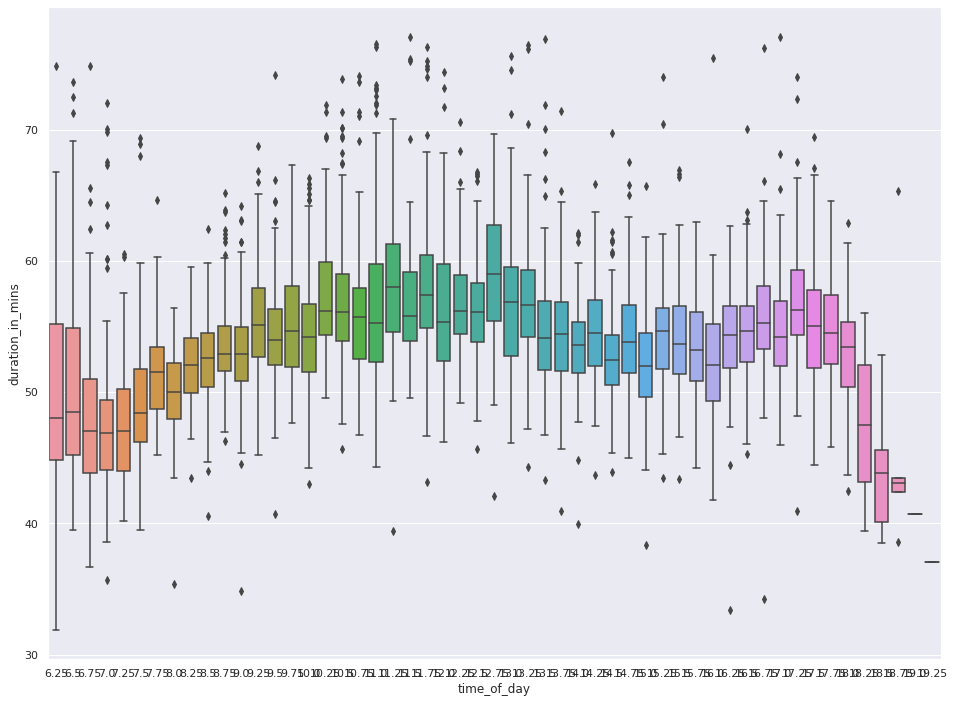

In [ ]:
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(16,12)})
sns.boxplot(x='time_of_day', y='duration_in_mins', data =  df2)

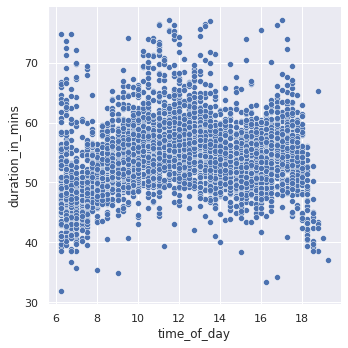

In [ ]:
sns.relplot(x='time_of_day', y='duration_in_mins', data =  df2)

In [ ]:
sns.relplot(x='time_of_day', y='duration_in_mins', data =  df2)

In [ ]:
graph1 =  pd.merge(df0.groupby('hour_of_day', as_index = False)['duration_in_mins'].mean(), df1.groupby('hour_of_day', as_index = False)['duration_in_mins'].mean(), on ='hour_of_day')

NameError: ignored

In [ ]:
graph1

In [ ]:
plt.plot(graph1['hour_of_day'],graph1['duration_in_mins_x'], label = 'Kandy-Digana')
plt.plot(graph1['hour_of_day'],graph1['duration_in_mins_y'], label = 'Digana-Kandy')
plt.xlabel('hour of day')
plt.ylabel('travel time')
plt.legend()
plt.show()

In [ ]:
print(scipy.stats.pearsonr(df1['duration_in_mins'],df1['day_of_week']))

In [ ]:
print(scipy.stats.pearsonr(df0['duration_in_mins'],df0['day_of_week']))

In [ ]:
print(scipy.stats.pearsonr(df1['duration_in_mins'],df1['hour_of_day']))

In [ ]:
print(scipy.stats.pearsonr(df0['duration_in_mins'],df0['hour_of_day']))

In [ ]:
4